In [1]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle

In [2]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [4]:
#data = ert.load(dir+"res2dinv_inputs/amphibious_ERT_eastern_transect2_gps.Dat")
data = ert.load(dir+"from_metadata/ERT_data_eastern_terrestrial_DAT.dat")
#data = ert.load(dir+"res2dinv_inputs/ERT_eastern_perpendicular_gps.Dat")
data.save('//smb.isipd.dmawi.de/projects/sparc/data/Sensors_Mobile/202307_DEPTHAW_InuvikTuk/IRISSyscalProSwitch/res2Dinv/ERT_data_eastern_terrestrial_DAT.txt', "a b m n rhoa")
data

20/02/25 - 11:19:06 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


Data: Sensors: 48 data: 565, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']

In [3]:
data = ert.load('//smb.isipd.dmawi.de/projects/sparc/data/Sensors_Mobile/202307_DEPTHAW_InuvikTuk/IRISSyscalProSwitch/res2Dinv/ERT_data_eastern_terrestrial_DAT.txt', "a b m n rhoa")
topo = pd.read_csv('//smb.isipd.dmawi.de/projects/sparc/data/Sensors_Mobile/202307_DEPTHAW_InuvikTuk/IRISSyscalProSwitch/level0_pangaea/TOPO_data_eastern_terrestrial.txt', sep='\t')

In [4]:
data_topo = ert.load(dir+"from_metadata/ERT_data_eastern_terrestrial_DAT.dat")


11/05/25 - 20:47:14 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


11/05/25 - 20:47:18 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 4): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\3443550554053488506
11/05/25 - 20:47:18 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (4.3s x 3): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\6690758415644880828


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1487ef900d0>)

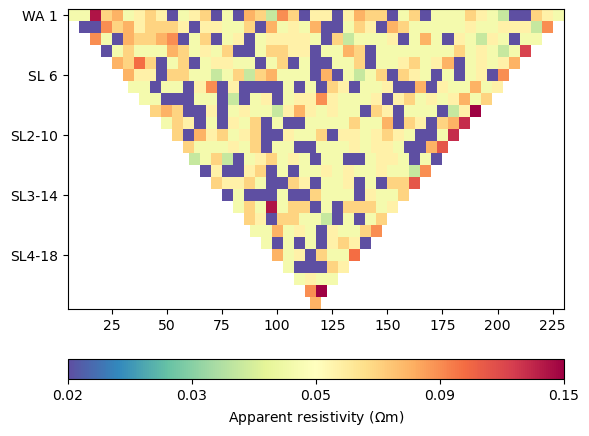

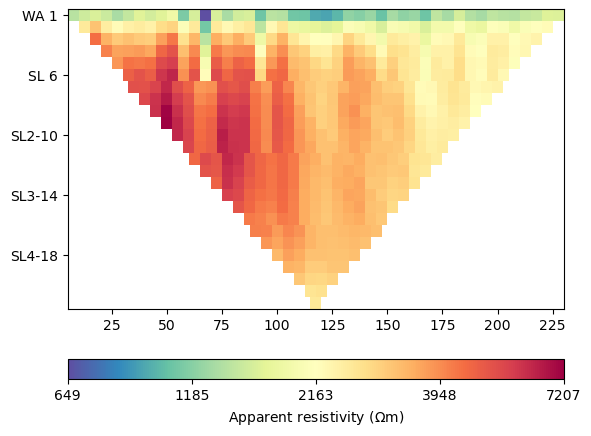

In [5]:
mgr = ert.ERTManager(data)
data['err'] = data['err'] + 0.02
data['k'] = ert.createGeometricFactors(data)
data['r'] = data['rhoa']/data['k']
data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data_topo.additionalPoints(), pg.x(data)))
data['k_topo'] = ert.createGeometricFactors(data, numerical=True)
data['rhoa'] = data['r']*data['k_topo']
#data.markInvalid(data['err']>=5)
#data['err'] = ert.estimateError(data, relativeError=0.04, absoluteUError=6e-5)
ert.show(data, data['err'])
ert.show(data)

In [6]:
np.mean(data['rhoa'])

3309.8257731883677

In [8]:
data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
data['k'] = ert.createGeometricFactors(data, numerical=True)
mgr = ert.ERTManager(data)
k0 = ert.createGeometricFactors(data)
ert.showData(data, vals=k0/data['k'], label='Topography effect')
data
data['k']

OverflowError: can't convert negative int to unsigned

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x148282f00d0>)

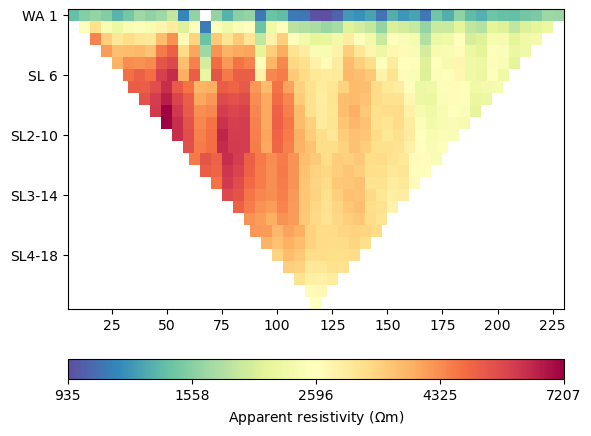

In [9]:
data.markInvalid(data['rhoa']<=650)

ert.showData(data)

0 -10.0 9.19281771 0.0
1 -10.0 -86.88695535596264 0.0
2 244.8372931242967 -86.88695535596264 0.0
3 244.8372931242967 7.047961893756055 0.0
4 -949.3491724971868 9.19281771 0.0
5 -949.3491724971868 -1024.0912720369054 0.0
6 1184.1864656214834 7.047961893756055 0.0
7 1184.1864656214834 -1026.2361278531494 0.0
8 0.0 9.19281771 0.0
9 1.25 9.19281771 0.0
10 3.75 9.19281771 0.0
11 5.0 9.19281771 0.0
12 6.249952262398835 9.20374207378173 0.0
13 8.749856787196503 9.225590801345188 0.0
14 9.999809049595338 9.236515165126917 0.0
15 11.24184811379337 9.377363721759115 0.0
16 13.72592624218943 9.659060835023514 0.0
17 14.967965306387462 9.799909391655712 0.0
18 16.21715807783547 9.844141739723565 0.0
19 18.715543620731484 9.932606435859274 0.0
20 19.964736392179493 9.976838783927127 0.0
21 21.214542043229937 9.955488249507702 0.0
22 23.71415334533083 9.91278718066885 0.0
23 24.963958996381272 9.891436646249426 0.0
24 26.21395762428537 9.89127939568707 0.0
25 28.71395488009356 9.890964894562357 0.0


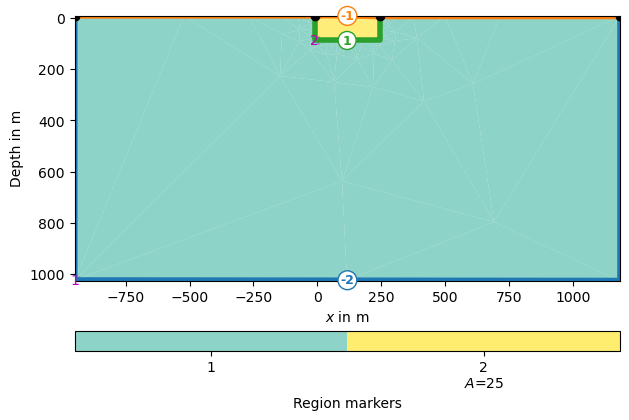

In [10]:
plc = mt.createParaMeshPLC(data,paraDX = 0.25, paraDZ= 0.25, paraMaxCellSize=25)
for i, n in enumerate(plc.nodes()[:]):
    #ax.text(n.x(), n.y(), str(i))
    print(i, n.x(), n.y(), n.z())
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())
ax, _ = pg.show(plc, markers=True)
mesh = mt.createMesh(plc)

11/05/25 - 20:48:15 - pyGIMLi - INFO - Found 2 regions.
11/05/25 - 20:48:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


11/05/25 - 20:48:15 - pyGIMLi - INFO - Creating forward mesh from region infos.
11/05/25 - 20:48:15 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
11/05/25 - 20:48:15 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5500 Cells: 10644 Boundaries: 8160
11/05/25 - 20:48:16 - pyGIMLi - INFO - Use median(data values)=3196.422926178583
11/05/25 - 20:48:16 - pyGIMLi - INFO - Created startmodel from forward operator:2129, min/max=3196.422926/3196.422926
11/05/25 - 20:48:16 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001487EF43AB0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 649/7207
min/max (error): 2%/15%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  119.20
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   17.08 (dPhi = 84.16%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.48 (dPhi = 68.14%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    2.12 (dPhi = 9.78%) lam: 30.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    2.08 (dPhi = 1.12%) lam: 30.0
#######################################################

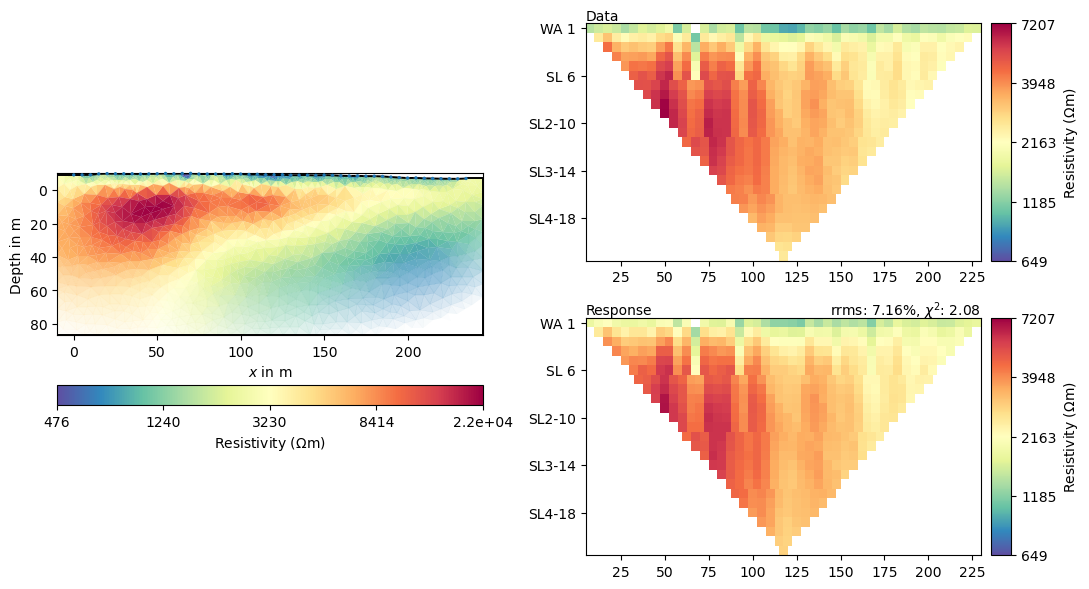

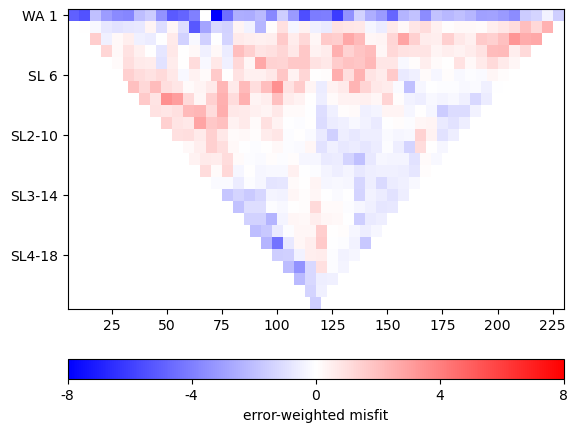

In [11]:
mgr.setMesh(mesh)


inv = mgr.invert(verbose=True, lam=30)


mgr.showResultAndFit()
mgr.showMisfit(errorWeighted=True)

11/05/25 - 20:49:17 - pyGIMLi - INFO - Found 2 regions.
11/05/25 - 20:49:17 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
11/05/25 - 20:49:17 - pyGIMLi - INFO - Creating forward mesh from region infos.
11/05/25 - 20:49:17 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
11/05/25 - 20:49:17 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5500 Cells: 10644 Boundaries: 8160


Text(83.19176363158374, 0.5, 'y (m)')

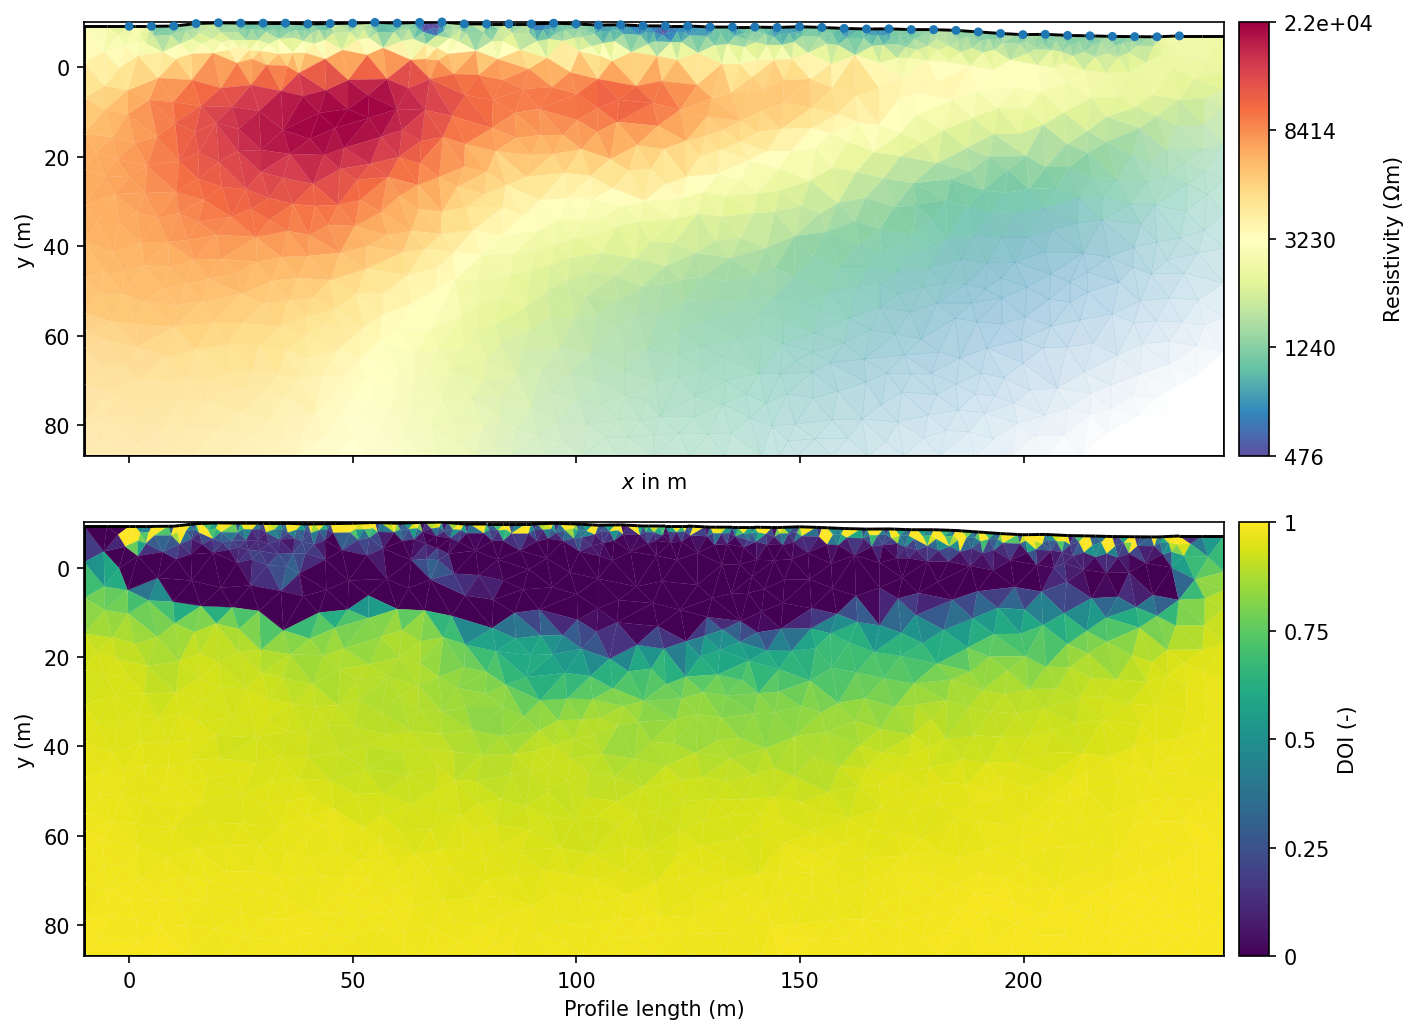

In [12]:
mgr.setMesh(mesh)
def run_inv(referencemodel):
    # Set reference model as startmodel
    mgr.inv.inv.setModel(referencemodel)

    # Set reference model
    rm = mgr.inv.fop.regionManager()
    rm.setConstraintType(10) # 0 = reference model, 1 = first-order smoothing (default), 10 = both
    rm.fillConstraints(mgr.inv.fop.constraints())
    mgr.inv.inv.setReferenceModel(referencemodel)
    model = mgr.inv.inv.run()
    return model

def compute_DOI(ref1, ref2):
    m1 = run_inv(ref1)
    m2 = run_inv(ref2)

    R = (m1 - m2) / (m1r - m2r)
    return R


m1r = np.ones(mgr.paraDomain.cellCount()) * 300
m2r = np.ones(mgr.paraDomain.cellCount()) * 30000

DOI = compute_DOI(m1r, m2r)

fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(10,7), dpi=150, sharex=True)

mgr.showResult(ax=ax1, orientation="vertical")
#ax1.set_xlabel("Profile length")
ax1.set_ylabel("y (m)")
pg.show(mgr.paraDomain, DOI, ax=ax2, cMin=0, cMax=1, orientation="vertical", label="DOI (-)")
ax2.set_xlabel("Profile length (m)")
ax2.set_ylabel("y (m)")

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_34140\3134687913.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])


Text(127.58333333333333, 0.5, 'Relative Elevation (m)')

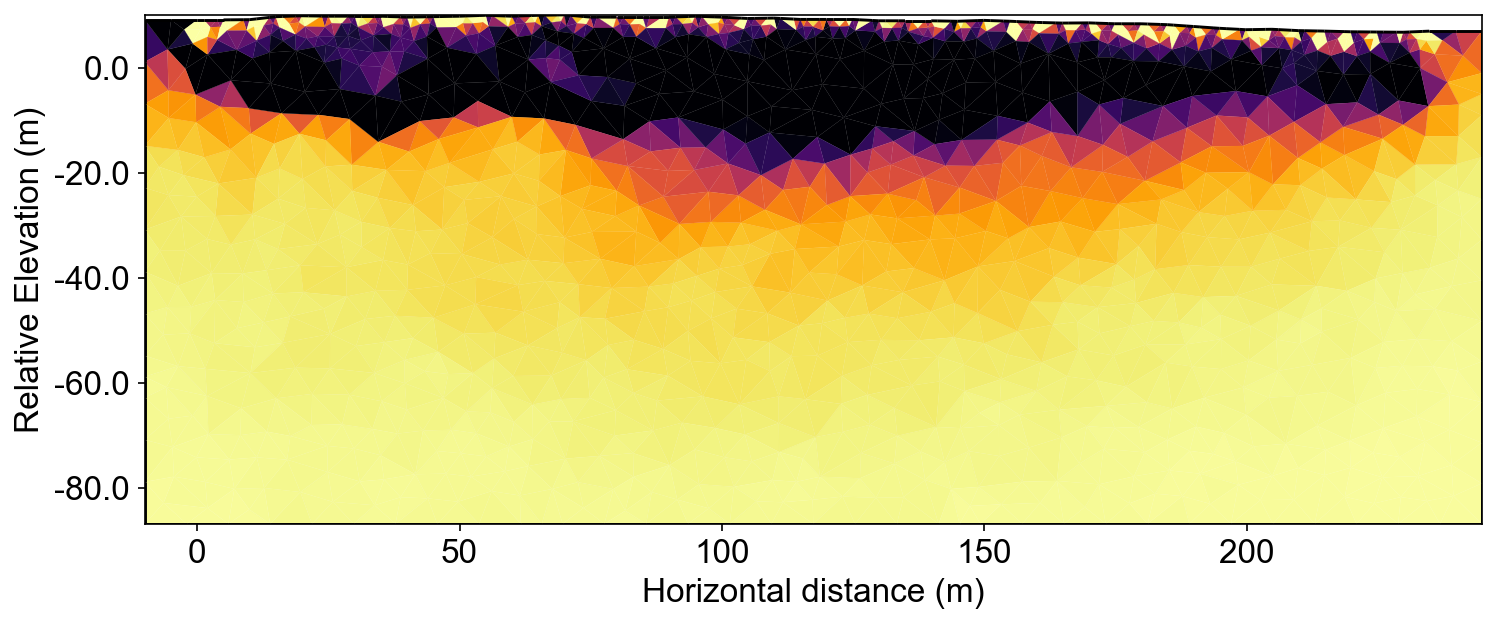

In [20]:
fig, (ax) = plt.subplots(1, 1, figsize=(10,5), dpi=150, sharex=True)
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'Arial'
mgr.showResult(ax=ax1, orientation="vertical")
#ax1.set_xlabel("Profile length")
#ax1.set_ylabel("y (m)")
pg.show(mgr.paraDomain, DOI, ax=ax, cMin=0, cMax=1, orientation="horizontal", label="DOI", cMap='inferno', colorBar=False)
ax.set_xlabel("Horizontal distance (m)")
ax.set_ylabel("y (m)")
current_ticks = ax.get_yticks()
relative_ticks = current_ticks   # Assuming 17 is the minimum elevation

# Set the new tick labels to show relative elevation

ax.set_yticklabels([f"{tick:.1f}" for tick in relative_ticks])
ax.set_ylabel("Relative Elevation (m)", fontsize=16)

In [31]:
mesh = mgr.paraDomain
mesh["DOI"] = DOI


mesh.exportVTK(dir+'pygimli/all_inversions/east_per_DOI.vtk')

Text(100.58333333333333, 0.5, 'y (m)')

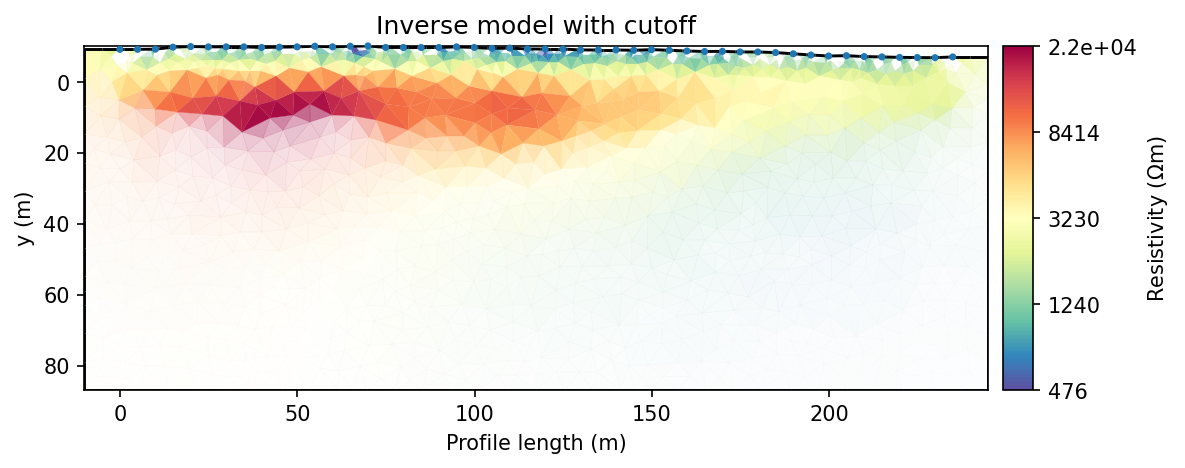

In [ ]:
import numpy as np

def doi_to_transparency(doi, doiThreshold=0.2, maxDOI=1.0):
    """
    Convert DOI values into transparency values for visualization.

    Parameters:
        doi (array-like): DOI values.
        doiThreshold (float): DOI value below which transparency is 1 (fully opaque).
        maxDOI (float): DOI value at which transparency is 0 (fully transparent).

    Returns:
        array-like: Transparency values (1 = opaque, 0 = fully transparent).
    """
    D = np.asarray(doi)
    
    # Initialize alpha (transparency) array
    alpha = np.ones_like(D)  # Default to fully opaque

    # Apply gradual transparency beyond the DOI threshold
    mask = D > doiThreshold
    alpha[mask] = 1.0 - (D[mask] - doiThreshold) / (maxDOI - doiThreshold)

    # Cap values to ensure transparency is within [0,1]
    alpha = np.clip(alpha, 0, 1)
    
    return alpha


#opacity = np.ones(mgr.paraDomain.cellCount())
#opacity[DOI > 0.5] = 0
opacity = doi_to_transparency(DOI)
fig, ax = plt.subplots(1,1, figsize=(8,5), dpi=150)
mgr.showResult(ax=ax, coverage=opacity, orientation = "vertical")
ax.set_title("Inverse model with cutoff")
ax.set_xlabel("Profile length (m)")
ax.set_ylabel("y (m)")

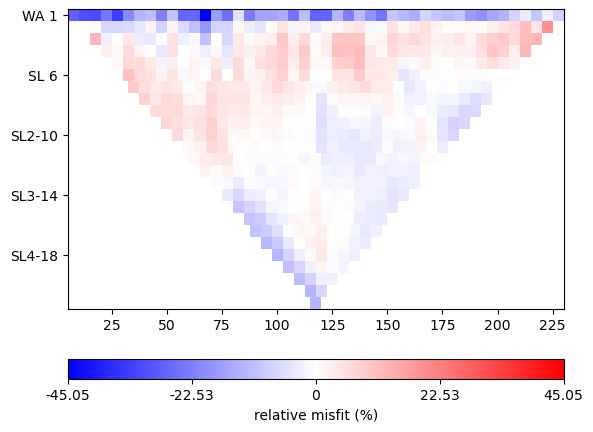

In [81]:
mgr.showMisfit()

21/02/25 - 23:03:34 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/ERTManager_eastern_perpendicular_mike/ERTManager


Path //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/ERTManager_eastern_perpendicular_mike/ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/ERTManager_eastern_perpendicular_mike/ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

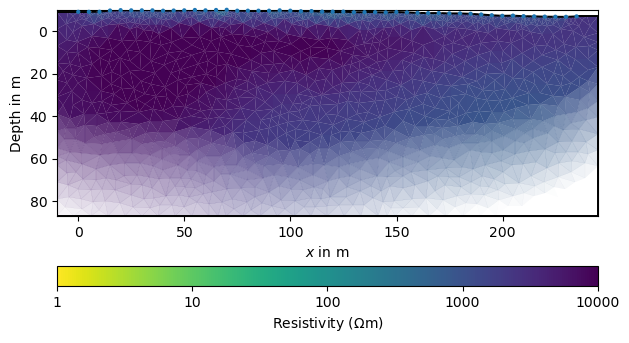

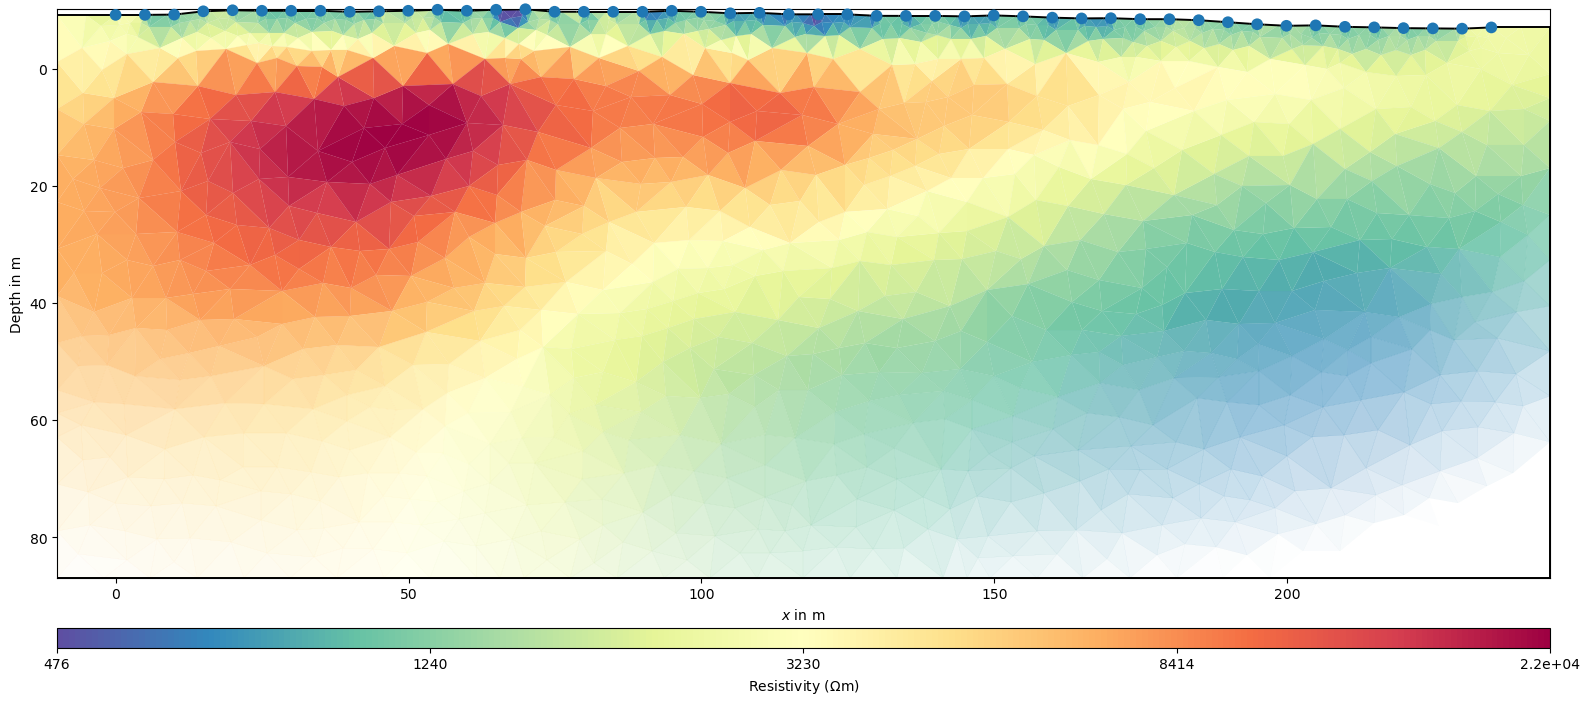

In [82]:
mgr.showResult(cMap="viridis_r", logScale=True, cMin=1, cMax=10000)
mgr.saveResult(dir+ 'pygimli/all_inversions/ERTManager_eastern_perpendicular_mike/')

21/02/25 - 09:59:45 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 09:59:45 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 09:59:45 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   10.86 (dPhi = 57.64%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   11.55 (dPhi = 0.77%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 3 ... 

21/02/25 - 10:01:12 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:01:12 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:01:12 - pyGIMLi - INFO - Starting inversion.


chi² =   11.54 (dPhi = 0.02%) lam: 1000.0
################################################################################
#                Abort criterion reached: dPhi = 0.02 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    9.85 (dPhi = 60.49%) lam: 799.9
--------------------------------------------------------------------------------
inv.iter 2 ... 

21/02/25 - 10:01:53 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:01:53 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:01:53 - pyGIMLi - INFO - Starting inversion.


chi² =   10.49 (dPhi = 1.08%) lam: 799.9
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   10.46 (dPhi = 0.02%) lam: 799.9
################################################################################
#                Abort criterion reached: dPhi = 0.02 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    8.96 (dPhi = 63.23%) lam: 639.9
-----

21/02/25 - 10:02:34 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:02:34 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:02:34 - pyGIMLi - INFO - Starting inversion.


chi² =    9.46 (dPhi = 0.03%) lam: 639.9
################################################################################
#                Abort criterion reached: dPhi = 0.03 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    8.17 (dPhi = 65.80%) lam: 511.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    8.62 (dPhi = 2.27%) lam: 511.9
-----

21/02/25 - 10:05:19 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:05:19 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:05:19 - pyGIMLi - INFO - Starting inversion.


chi² =    8.54 (dPhi = 0.05%) lam: 511.9
################################################################################
#                Abort criterion reached: dPhi = 0.05 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    7.50 (dPhi = 68.18%) lam: 409.5
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    7.79 (dPhi = 3.32%) lam: 409.5
-----

21/02/25 - 10:07:58 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:07:58 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:07:58 - pyGIMLi - INFO - Starting inversion.


chi² =    7.68 (dPhi = 0.08%) lam: 409.5
################################################################################
#                Abort criterion reached: dPhi = 0.08 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    6.93 (dPhi = 70.36%) lam: 327.6
--------------------------------------------------------------------------------
inv.iter 2 ... 

21/02/25 - 10:09:15 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:09:15 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:09:15 - pyGIMLi - INFO - Starting inversion.


chi² =    7.03 (dPhi = 4.79%) lam: 327.6
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    6.89 (dPhi = 0.13%) lam: 327.6
################################################################################
#                Abort criterion reached: dPhi = 0.13 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    6.47 (dPhi = 72.32%) lam: 262.0
-----

21/02/25 - 10:09:56 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:09:56 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:09:56 - pyGIMLi - INFO - Starting inversion.


chi² =    6.32 (dPhi = 6.80%) lam: 262.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    6.16 (dPhi = 0.18%) lam: 262.0
################################################################################
#                Abort criterion reached: dPhi = 0.18 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    6.12 (dPhi = 74.04%) lam: 209.6
-----

21/02/25 - 10:10:54 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:10:54 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:10:54 - pyGIMLi - INFO - Starting inversion.


chi² =    5.47 (dPhi = 0.28%) lam: 209.6
################################################################################
#                Abort criterion reached: dPhi = 0.28 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.86 (dPhi = 75.53%) lam: 167.7
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    5.07 (dPhi = 12.70%) lam: 167.7
----

21/02/25 - 10:15:02 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:15:02 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:15:02 - pyGIMLi - INFO - Starting inversion.


chi² =    4.86 (dPhi = 0.31%) lam: 167.7
################################################################################
#                Abort criterion reached: dPhi = 0.31 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.70 (dPhi = 76.81%) lam: 134.1
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    4.48 (dPhi = 16.66%) lam: 134.1
----

21/02/25 - 10:18:53 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:18:53 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:18:53 - pyGIMLi - INFO - Starting inversion.


chi² =    4.29 (dPhi = 0.32%) lam: 134.1
################################################################################
#                Abort criterion reached: dPhi = 0.32 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.61 (dPhi = 77.88%) lam: 107.3
--------------------------------------------------------------------------------
inv.iter 2 ... 

21/02/25 - 10:19:37 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:19:37 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:19:37 - pyGIMLi - INFO - Starting inversion.


chi² =    3.94 (dPhi = 21.21%) lam: 107.3
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    3.78 (dPhi = 0.31%) lam: 107.3
################################################################################
#                Abort criterion reached: dPhi = 0.31 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.59 (dPhi = 78.76%) lam: 85.8
-----

21/02/25 - 10:20:30 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:20:30 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:20:30 - pyGIMLi - INFO - Starting inversion.


chi² =    3.43 (dPhi = 26.21%) lam: 85.8
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    3.33 (dPhi = 0.31%) lam: 85.8
################################################################################
#                Abort criterion reached: dPhi = 0.31 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.62 (dPhi = 79.48%) lam: 68.7
-------

21/02/25 - 10:23:01 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:23:01 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:23:01 - pyGIMLi - INFO - Starting inversion.


chi² =    2.91 (dPhi = 0.40%) lam: 68.7
################################################################################
#                 Abort criterion reached: dPhi = 0.4 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.70 (dPhi = 80.05%) lam: 54.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.56 (dPhi = 36.96%) lam: 54.9
-------

21/02/25 - 10:25:44 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:25:44 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:25:44 - pyGIMLi - INFO - Starting inversion.


chi² =    2.53 (dPhi = 0.63%) lam: 54.9
################################################################################
#                Abort criterion reached: dPhi = 0.63 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.81 (dPhi = 80.48%) lam: 43.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.20 (dPhi = 42.39%) lam: 43.9
-------

21/02/25 - 10:26:25 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:26:25 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:26:25 - pyGIMLi - INFO - Starting inversion.


chi² =    2.17 (dPhi = 1.09%) lam: 43.9
################################################################################
#                Abort criterion reached: dPhi = 1.09 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.96 (dPhi = 80.78%) lam: 35.1
--------------------------------------------------------------------------------
inv.iter 2 ... 

21/02/25 - 10:26:56 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:26:56 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:26:56 - pyGIMLi - INFO - Starting inversion.


chi² =    1.89 (dPhi = 47.70%) lam: 35.1
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.86 (dPhi = 1.84%) lam: 35.1
################################################################################
#                Abort criterion reached: dPhi = 1.84 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.57 (dPhi = 82.78%) lam: 28.1
-------

21/02/25 - 10:27:42 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:27:42 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:27:42 - pyGIMLi - INFO - Starting inversion.


chi² =    1.59 (dPhi = 0.03%) lam: 28.1
################################################################################
#                Abort criterion reached: dPhi = 0.03 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.59 (dPhi = 83.27%) lam: 22.5
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.34 (dPhi = 52.32%) lam: 22.5
-------

21/02/25 - 10:29:37 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:29:37 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:29:37 - pyGIMLi - INFO - Starting inversion.


chi² =    1.36 (dPhi = 0.11%) lam: 22.5
################################################################################
#                Abort criterion reached: dPhi = 0.11 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.69 (dPhi = 83.44%) lam: 18.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.17 (dPhi = 57.01%) lam: 18.0
-------

21/02/25 - 10:31:54 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:31:54 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:31:54 - pyGIMLi - INFO - Starting inversion.


chi² =    1.16 (dPhi = 0.26%) lam: 18.0
################################################################################
#                Abort criterion reached: dPhi = 0.26 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.72 (dPhi = 83.76%) lam: 14.4
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.04 (dPhi = 60.84%) lam: 14.4
-------

21/02/25 - 10:32:40 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:32:40 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:32:40 - pyGIMLi - INFO - Starting inversion.


chi² =    0.98 (dPhi = 6.31%) lam: 14.4


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.98)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.76 (dPhi = 84.01%) lam: 11.5
--------------------------------------------------------------------------------
inv.iter 2 ... 

21/02/25 - 10:33:13 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:33:13 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:33:13 - pyGIMLi - INFO - Starting inversion.


chi² =    0.94 (dPhi = 64.44%) lam: 11.5


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.94)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.80 (dPhi = 84.19%) lam: 9.2
--------------------------------------------------------------------------------
inv.iter 2 ... 

21/02/25 - 10:34:11 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:34:11 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:34:11 - pyGIMLi - INFO - Starting inversion.


chi² =    0.87 (dPhi = 67.73%) lam: 9.2


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.87)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.86 (dPhi = 84.29%) lam: 7.4
--------------------------------------------------------------------------------
inv.iter 2 ... 

21/02/25 - 10:36:15 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:36:15 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:36:15 - pyGIMLi - INFO - Starting inversion.


chi² =    0.82 (dPhi = 70.67%) lam: 7.4


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.82)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.92 (dPhi = 84.33%) lam: 5.9
--------------------------------------------------------------------------------
inv.iter 2 ... 

21/02/25 - 10:37:35 - pyGIMLi - INFO - Use median(data values)=3196.422926178552


chi² =    0.79 (dPhi = 73.25%) lam: 5.9


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.79)                   #
################################################################################


21/02/25 - 10:37:35 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:37:35 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    6.10 (dPhi = 84.05%) lam: 4.7
--------------------------------------------------------------------------------
inv.iter 2 ... 

21/02/25 - 10:38:32 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:38:32 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:38:32 - pyGIMLi - INFO - Starting inversion.


chi² =    0.77 (dPhi = 76.03%) lam: 4.7


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.77)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    6.19 (dPhi = 83.96%) lam: 3.8
--------------------------------------------------------------------------------
inv.iter 2 ... 

21/02/25 - 10:39:29 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:39:29 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:39:29 - pyGIMLi - INFO - Starting inversion.


chi² =    0.77 (dPhi = 77.90%) lam: 3.8


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.77)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    6.29 (dPhi = 83.82%) lam: 3.0
--------------------------------------------------------------------------------
inv.iter 2 ... 

21/02/25 - 10:40:03 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:40:03 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:40:03 - pyGIMLi - INFO - Starting inversion.


chi² =    0.78 (dPhi = 79.43%) lam: 3.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.78)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... 

21/02/25 - 10:41:00 - pyGIMLi - INFO - Use median(data values)=3196.422926178552
21/02/25 - 10:41:00 - pyGIMLi - INFO - Created startmodel from forward operator: 1108, min/max=3196.422926/3196.422926
21/02/25 - 10:41:00 - pyGIMLi - INFO - Starting inversion.


chi² =    6.41 (dPhi = 83.62%) lam: 2.4
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    0.81 (dPhi = 80.63%) lam: 2.4


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.81)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001B27F28A020>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001B27F1E9C60>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001B27F289B20>
min/max (data): 649/7207
min/max (error): 4%/17%
min/max (start model): 3196/3196
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   40.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    6.54 (dPhi = 83.38%) lam: 1.9
-------

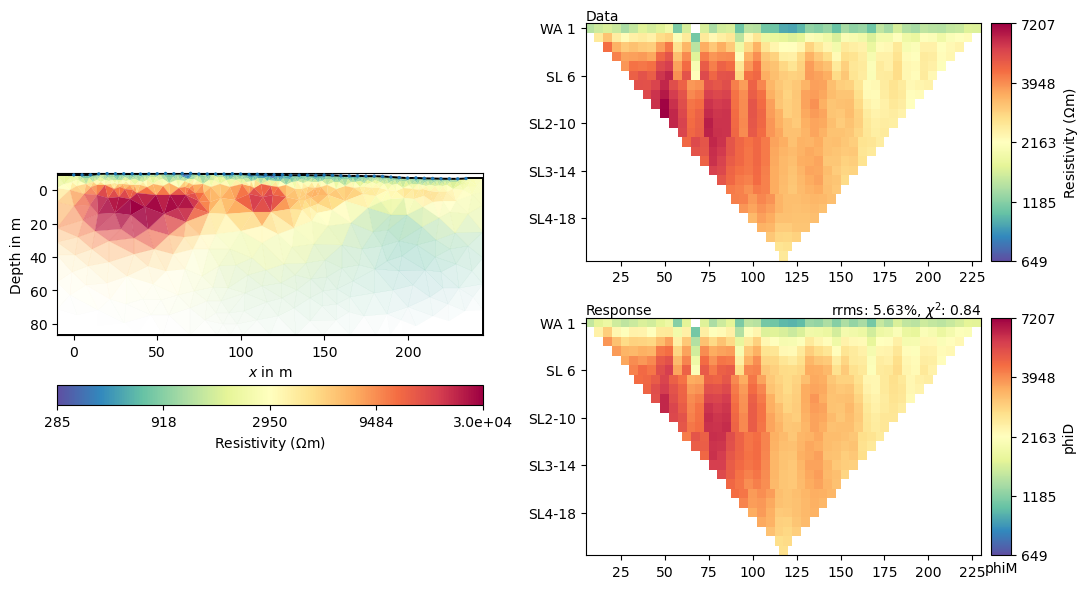

In [63]:

lambdas = np.logspace(np.log10(1000), np.log10(1.93), num=29)

phiD = []
phiM = []
for lam in lambdas:
    mgr.invert(data, lam=lam, verbose=True)
    phiD.append(mgr.inv.phiData())
    phiM.append(mgr.inv.phiModel())


mgr.showResultAndFit()

phiD = np.array(phiD)
phiM = np.array(phiM)

from kneed import DataGenerator, KneeLocator
kneedle = KneeLocator(phiM, phiD, S=1.0, curve="convex", direction="decreasing",interp_method='interp1d')

print(round(kneedle.elbow, 3))
print(round(kneedle.knee_y, 3))
print(lambdas[np.where(phiM==kneedle.knee)[0]])
opt_lam = lambdas[np.where(phiM==kneedle.knee)[0]]

plt.xlabel('phiM')
plt.ylabel('phiD')
plt.plot(phiM, phiD, 'bx-')
plt.vlines(kneedle.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

38.768
898.372
[28.11188004]


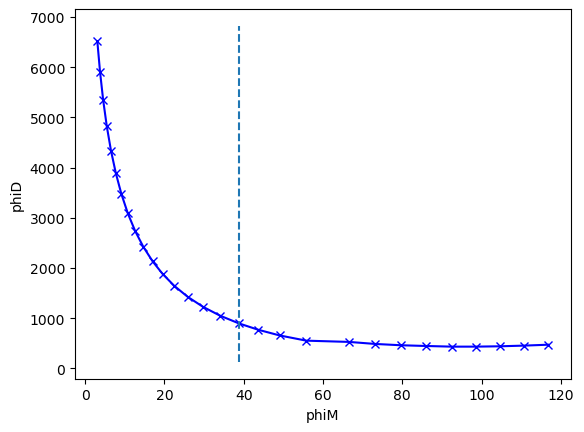

In [65]:
from kneed import DataGenerator, KneeLocator
kneedle = KneeLocator(phiM, phiD, online=True, curve="convex", direction="decreasing",interp_method='polynomial', polynomial_degree=3)

print(round(kneedle.elbow, 3))
print(round(kneedle.elbow_y, 3))
print(lambdas[np.where(phiM==kneedle.elbow)[0]])

plt.xlabel('phiM')
plt.ylabel('phiD')
plt.plot(phiM, phiD, 'bx-')
plt.vlines(kneedle.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x28e3f352810>)

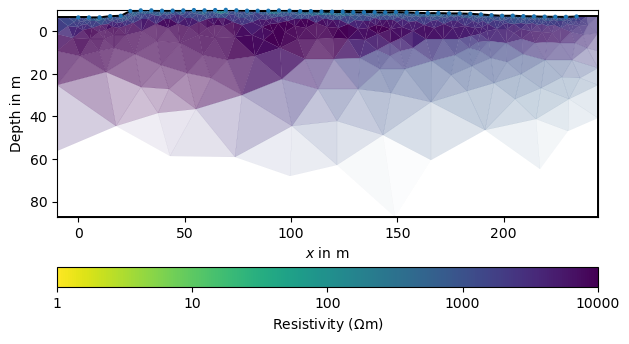

In [23]:
mgr.showResult(cMap='viridis_r', cMin=1, cMax=10000)

(-40.0, 11.141096614746566)

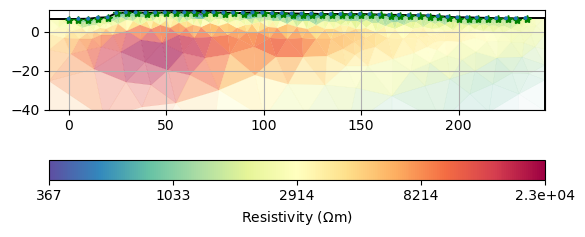

In [18]:
from pygimli.viewer.mpl import draw1DColumn

AL = np.loadtxt(dir + "pygimli/AL_eastern_parallel_to_shore.txt")

x_AL = AL[:, 0]
z_AL = AL[:, 1]

ax, cb = mgr.showResult()
#ax.plot(ibpt_x, ibpt_depth_smoothed, ":", linewidth=1, color='black')
ax.plot(x_AL, z_AL, 'g*', linewidth=0.5)
ax.grid(True)
ax.set_ylim(-40)

22.464
1646.365
[68.65424858]


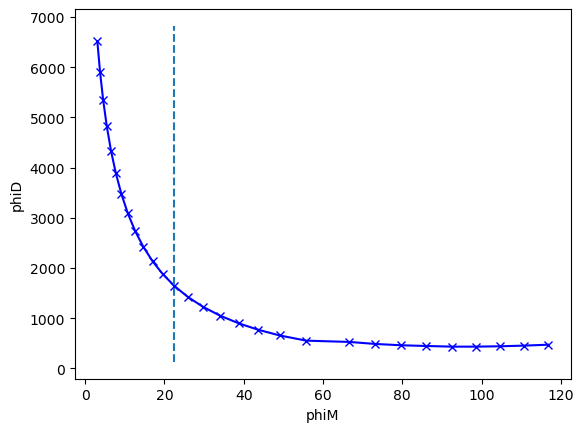

In [62]:
from kneed import DataGenerator, KneeLocator
kneedle = KneeLocator(phiM, phiD, S=1.0, curve="convex", direction="decreasing",interp_method='polynomial')

print(round(kneedle.elbow, 3))
print(round(kneedle.knee_y, 3))
print(lambdas[np.where(phiM==kneedle.knee)[0]])
opt_lam = lambdas[np.where(phiM==kneedle.knee)[0]]

plt.xlabel('phiM')
plt.ylabel('phiD')
plt.plot(phiM, phiD, 'bx-')
plt.vlines(kneedle.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')